In [15]:
# setting up the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


data = pd.read_csv('../CW2_Datasets/Dataset1.csv')

data.head()

df = pd.DataFrame(data)

# delete id from the table
edited_df = df.drop('id', axis='columns')



In [16]:
# changing the attribute values

edited_df['sex'].replace(
    ['Male','Female'],
    [0,1],
    inplace=True  
)
edited_df['Origin'].replace(
    ['Cleveland','Hungary', 'Switzerland', 'VA Long Beach'],
    [0,1,2,3],
    inplace=True  
)
edited_df['cp'].replace(
    ['typical angina','asymptomatic', 'non-anginal', 'atypical angina'],
    [0,1,2,3],
    inplace=True  
)
edited_df['restecg'].replace(
    ['lv hypertrophy','normal', 'st-t abnormality'],
    [0,1,2],
    inplace=True  
)
edited_df['slope'].replace(
    ['downsloping','flat', 'upsloping'],
    [0,1,2],
    inplace=True  
)
edited_df['thal'].replace(
    ['fixed defect', 'normal', 'reversable defect'],
    [0,1,2],
    inplace=True  
)
edited_df['level'].replace(
    [0, 1, 2, 3, 4],
    [0, 1, 1, 1, 1],
    inplace=True
) # changing the values above 0 to 1 for binary classification
edited_df.head()



/tmp/ipykernel_1760365/682164172.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  edited_df['sex'].replace(
/tmp/ipykernel_1760365/682164172.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  edited_df['sex'].replace(
/tmp/ipykernel_1760365/682164172.py:8: FutureWarning: A value is trying to be 

,age,sex,Origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,level
0,63,0,0,0,145.0,233.0,True,0.0,150.0,False,2.3,0.0,0.0,0.0,0
1,67,0,0,1,160.0,286.0,False,0.0,108.0,True,1.5,1.0,3.0,1.0,1
2,67,0,0,1,120.0,229.0,False,0.0,129.0,True,2.6,1.0,2.0,2.0,1
3,37,0,0,2,130.0,250.0,False,1.0,187.0,False,3.5,0.0,0.0,1.0,0
4,41,1,0,3,130.0,204.0,False,0.0,172.0,False,1.4,2.0,0.0,1.0,0


In [17]:
# splitting the input features

X = edited_df.iloc[:,1:-1]
# print(X)
y = edited_df.iloc[:,14]
# print(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=60, random_state=0)


In [18]:
# creating the decision tree

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


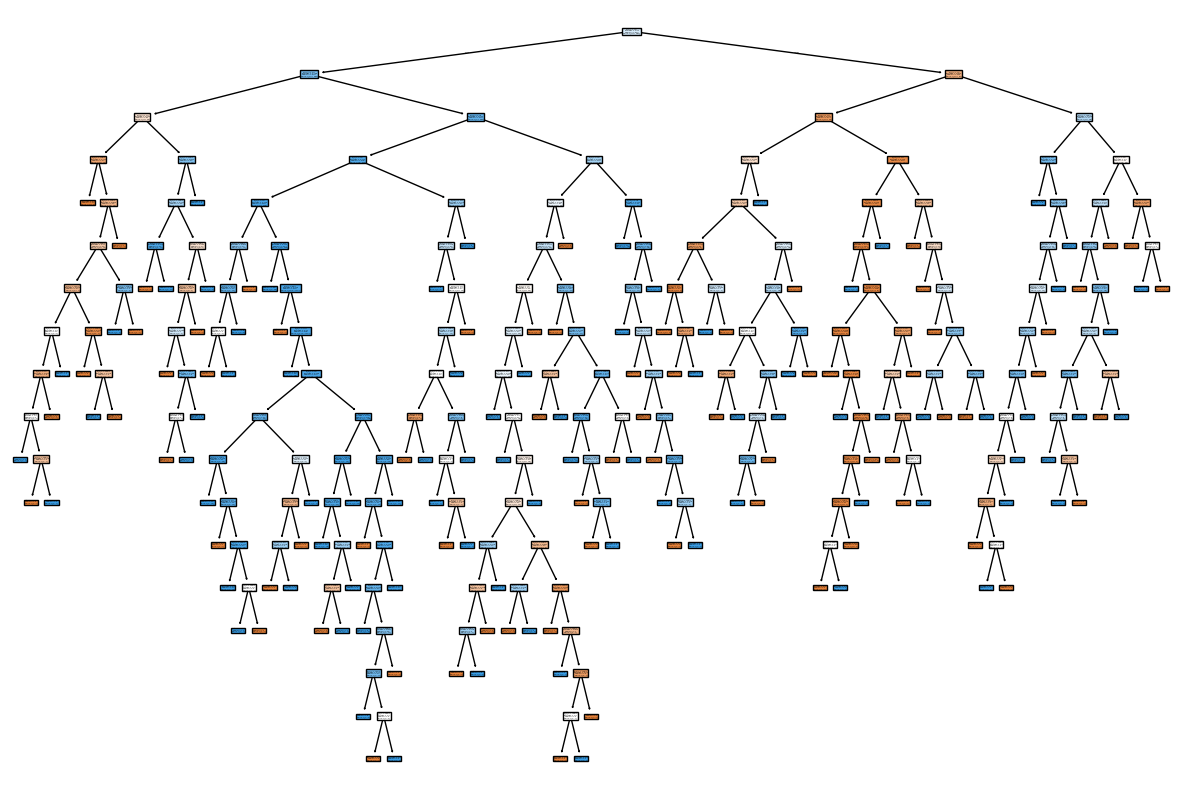

In [ ]:
# show the decision tree

from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(classifier, filled=True)
plt.show()

In [20]:
# predict the test results

y_pred = classifier.predict(X_test)

In [ ]:
# getting the accuracy of the results

from sklearn.metrics import confusion_matrix, classification_report

cm =  confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print('confusion matrix: \n', cm)
print('classification report: \n', cr)

confusion matrix: 
 [[21 10]
 [ 8 21]]
classification report: 
               precision    recall  f1-score   support

           0       0.72      0.68      0.70        31
           1       0.68      0.72      0.70        29

    accuracy                           0.70        60
   macro avg       0.70      0.70      0.70        60
weighted avg       0.70      0.70      0.70        60

